# **Social Media Fake Account Detection - Random Forest**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Load Training & Testing Data***

In [8]:
train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")
print(train_data.head())
print(train_data["fake"].value_counts())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2 

 ***Combine dataset***

In [9]:
df = pd.concat([train_data, test_data], ignore_index=True)
print(df.head())
print(df["fake"].value_counts())

# Check missing values
print(df.isnull().sum())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2 

***Split features & target***

In [10]:
X = df.drop(columns=["fake"], axis=1)
y = df["fake"]

***Train-Test Split***

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


***Random Forest Model***

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

**Evaluate Model**

Accuracy : 0.9195402298850575

Confusion Matrix:
 [[82  5]
 [ 9 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        87
           1       0.94      0.90      0.92        87

    accuracy                           0.92       174
   macro avg       0.92      0.92      0.92       174
weighted avg       0.92      0.92      0.92       174



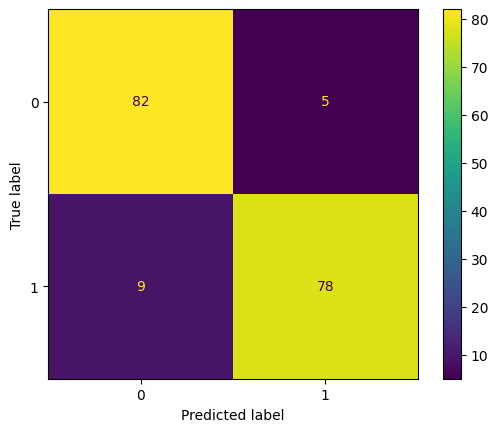

In [13]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy :", acc)
print("\nConfusion Matrix:\n", conf)
print("\nClassification Report:\n", cr)

ConfusionMatrixDisplay(conf).plot()


***Predict for NEW PERSON/ACCOUNT***

In [14]:
sample = [[1, 0.54, 3, 0, 40, 0, 1, 2, 90, 300, 540]]
result = model.predict(sample)

if result[0] == 1:
    print("⚠️ This account is FAKE")
else:
    print("✅ This account is REAL")

⚠️ This account is FAKE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**SAVE MODEL**

In [18]:
from joblib import dump
dump(model, "/content/drive/MyDrive/fake_account_model.joblib")


['/content/drive/MyDrive/fake_account_model.joblib']

**LOAD MODEL**

In [17]:
from joblib import load
model = load("/content/drive/MyDrive/fake_account_model.joblib")
